<a href="https://colab.research.google.com/github/oborominami/oborominami/blob/master/kanaboon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab/Trial

/content/drive/MyDrive/Colab/Trial


In [ ]:
%run prepare_images.py datasets/mydata/

Copied images from datasets/mydata/Hanamuguri
Copied images from datasets/mydata/Kanabun
Copied images from datasets/mydata/Koganemusi


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import shutil
import math
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
import visualize

print(tf.__version__)

2.6.0


In [ ]:
train_dir = 'target_datasets/train'
val_dir = 'target_datasets/val'

backup_dir = './model'

labels = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
labels.sort()

if os.path.exists(backup_dir):
    shutil.rmtree(backup_dir)

os.makedirs(backup_dir)

with open(backup_dir + '/labels.txt','w') as f:
    for label in labels:
        f.write(label+"\n")

NUM_CLASSES = len(labels)
print("class number=" + str(NUM_CLASSES))

labels = []
with open(backup_dir + '/labels.txt','r') as f:
    for line in f:
        labels.append(line.rstrip())
print(labels)

class number=3
['Hanamuguri', 'Kanabun', 'Koganemusi']


In [ ]:
# 学習率
LEARNING_RATE = 0.001
# エポック（世代数）
EPOCHS = 150
# バッチサイズ
BATCH_SIZE = 32

IMAGE_SIZE = 264

In [ ]:
train_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=360)
#train_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=180, width_shift_range=0.2, height_shift_range=0.2)
val_data_gen = ImageDataGenerator(rescale=1./255)

# メモ：ImageDataGenerator.flow_from_directory はIteratorを返す
train_data = train_data_gen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

validation_data = val_data_gen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=False)

Found 72 images belonging to 3 classes.
Found 18 images belonging to 3 classes.


## Train Data Sample ##


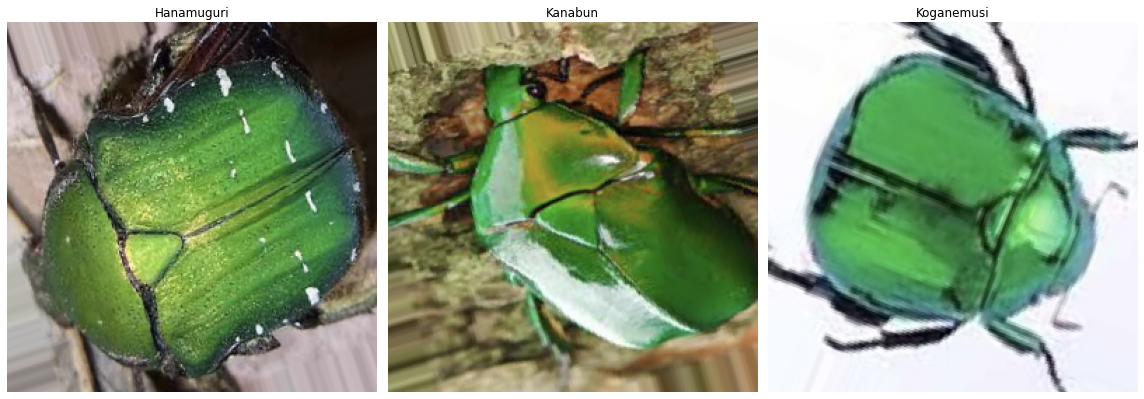

In [ ]:
# Display train data sample
visualize.pick_train_sample(labels, train_data)

# AI model definition
model = Sequential()

model.add(Conv2D(10, (3, 3), padding='same',
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Activation('relu'))
model.add(Conv2D(10, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(6, 6)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

In [ ]:
opt = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
#opt = tf.keras.optimizers.SGD(lr=LEARNING_RATE)

model.compile(opt, loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

# Execute train
history = model.fit(train_data, epochs=EPOCHS, validation_data=validation_data, verbose=1)

score = model.evaluate(validation_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 264, 264, 10)      280       
_________________________________________________________________
activation_28 (Activation)   (None, 264, 264, 10)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 262, 262, 10)      910       
_________________________________________________________________
activation_29 (Activation)   (None, 262, 262, 10)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 43, 43, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 18490)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)              

Prediction data
[[0.124 0.876 0.   ]
 [1.    0.    0.   ]
 [0.998 0.001 0.001]
 [0.998 0.002 0.   ]
 [0.045 0.004 0.952]
 [0.58  0.42  0.   ]
 [0.    0.893 0.107]
 [0.994 0.006 0.   ]
 [0.    0.833 0.167]
 [0.    0.008 0.992]
 [0.001 0.999 0.   ]
 [0.    0.971 0.029]
 [0.306 0.183 0.511]
 [0.029 0.194 0.777]
 [0.002 0.    0.998]
 [0.    0.    1.   ]
 [0.188 0.299 0.513]
 [0.    0.086 0.914]]
(18, 3)
#0 Expected:Hanamuguri -> Predicted:Kanabun
File: Hanamuguri/IMG_5773.PNG
Each Prediction Value: [0.124 0.876 0.   ]
**** INCORRECT ****


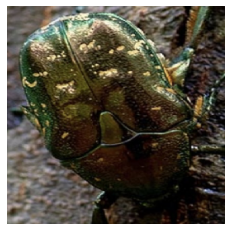

#1 Expected:Hanamuguri -> Predicted:Hanamuguri
File: Hanamuguri/IMG_5849.JPG
Each Prediction Value: [1. 0. 0.]
* Correct *
#2 Expected:Hanamuguri -> Predicted:Hanamuguri
File: Hanamuguri/IMG_5852.JPG
Each Prediction Value: [0.998 0.001 0.001]
* Correct *
#3 Expected:Hanamuguri -> Predicted:Hanamuguri
File: Hanamuguri/IMG_5858 (1).JPG
Each Prediction Value: [0.998 0.002 0.   ]
* Correct *
#4 Expected:Hanamuguri -> Predicted:Koganemusi
File: Hanamuguri/IMG_5861.JPG
Each Prediction Value: [0.045 0.004 0.952]
**** INCORRECT ****


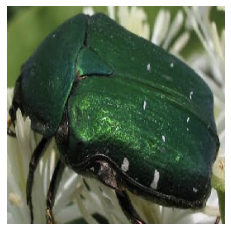

#5 Expected:Hanamuguri -> Predicted:Hanamuguri
File: Hanamuguri/IMG_5869.JPG
Each Prediction Value: [0.58 0.42 0.  ]
* Correct *
#6 Expected:Kanabun -> Predicted:Kanabun
File: Kanabun/IMG_5768.PNG
Each Prediction Value: [0.    0.893 0.107]
* Correct *
#7 Expected:Kanabun -> Predicted:Hanamuguri
File: Kanabun/IMG_5769.JPG
Each Prediction Value: [0.994 0.006 0.   ]
**** INCORRECT ****


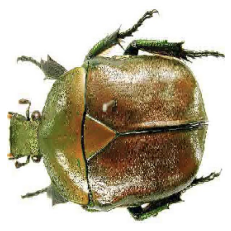

#8 Expected:Kanabun -> Predicted:Kanabun
File: Kanabun/IMG_5815.JPG
Each Prediction Value: [0.    0.833 0.167]
* Correct *
#9 Expected:Kanabun -> Predicted:Koganemusi
File: Kanabun/IMG_5826.PNG
Each Prediction Value: [0.    0.008 0.992]
**** INCORRECT ****


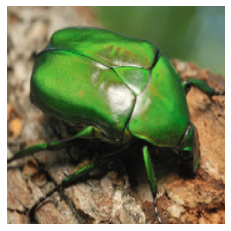

#10 Expected:Kanabun -> Predicted:Kanabun
File: Kanabun/IMG_5838.JPG
Each Prediction Value: [0.001 0.999 0.   ]
* Correct *
#11 Expected:Kanabun -> Predicted:Kanabun
File: Kanabun/IMG_5842.JPG
Each Prediction Value: [0.    0.971 0.029]
* Correct *
#12 Expected:Koganemusi -> Predicted:Koganemusi
File: Koganemusi/IMG_5780.JPG
Each Prediction Value: [0.306 0.183 0.511]
* Correct *
#13 Expected:Koganemusi -> Predicted:Koganemusi
File: Koganemusi/IMG_5791.JPG
Each Prediction Value: [0.029 0.194 0.777]
* Correct *
#14 Expected:Koganemusi -> Predicted:Koganemusi
File: Koganemusi/IMG_5794.JPG
Each Prediction Value: [0.002 0.    0.998]
* Correct *
#15 Expected:Koganemusi -> Predicted:Koganemusi
File: Koganemusi/IMG_5801.PNG
Each Prediction Value: [0. 0. 1.]
* Correct *
#16 Expected:Koganemusi -> Predicted:Koganemusi
File: Koganemusi/IMG_5802.PNG
Each Prediction Value: [0.188 0.299 0.513]
* Correct *
#17 Expected:Koganemusi -> Predicted:Koganemusi
File: Koganemusi/IMG_5806.JPG
Each Prediction Va

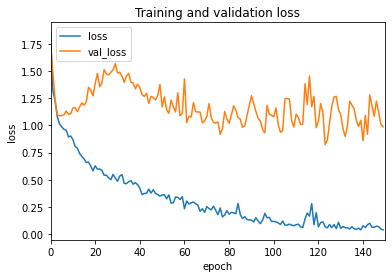

Accuracy


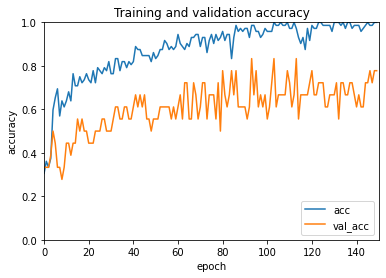

Confusion Matrix


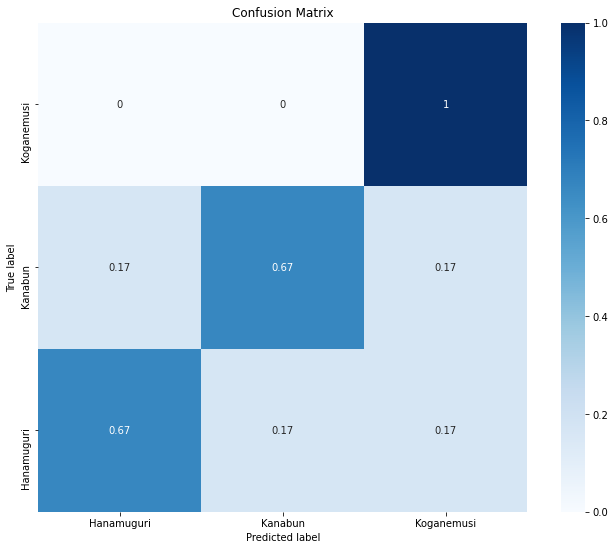

In [ ]:
# Failed pictures
visualize.vis_failed_pic(model, labels, validation_data, val_dir, BATCH_SIZE, 100)

# Visualize loss
visualize.vis_loss_accuracy(history, EPOCHS)

# Save model
save_model_path = os.path.join(backup_dir, 'my_model.h5')
model.save(save_model_path)

# Confusion Matrix
visualize.vis_confusion_matrix(model, validation_data)